<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is an SVM?**

Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.

You can use them to detect cancerous cells based on millions of images or you can use them to predict future driving routes with a well-fitted regression model.
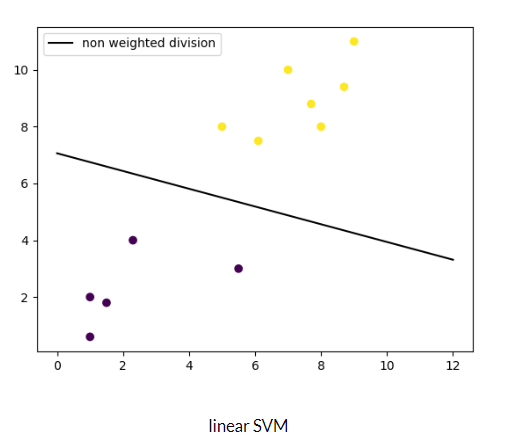

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))


In [ ]:
# Split data into features (X) and target (y)
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [ ]:
# Normalize training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Predictions on the test set
y_predict = svm_model.predict(X_test_scaled)

In [ ]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

Confusion Matrix:
[[47  1]
 [ 0 66]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



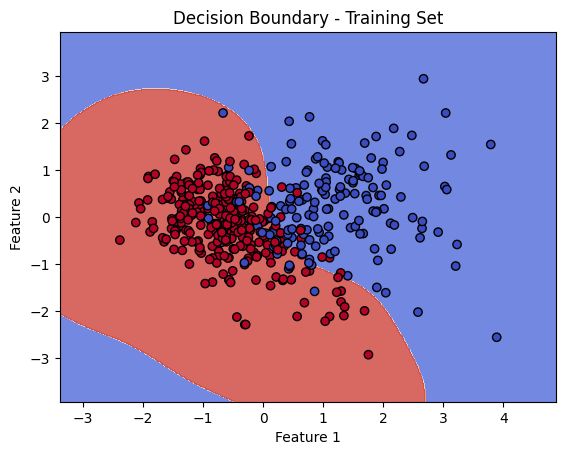

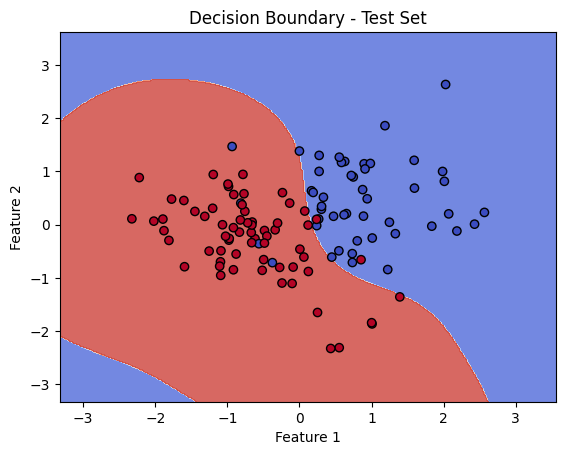

In [ ]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Assuming you have only two features for simplicity
features_for_pca = ['mean radius', 'mean texture']

# Get column indices for the selected features
feature_indices = [df_cancer.columns.get_loc(feature) for feature in features_for_pca]

# Project data to 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled[:, feature_indices])
X_test_pca = pca.transform(X_test_scaled[:, feature_indices])

# Train SVM model on reduced-dimensional data
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)

# Plot decision boundary
plot_decision_boundary(X_train_pca, y_train, svm_model, 'Decision Boundary - Training Set')
plot_decision_boundary(X_test_pca, y_test, svm_model, 'Decision Boundary - Test Set')


